<a href="https://colab.research.google.com/github/Jaimemorillo/ShouldIwatchThisMovie/blob/master/memoria_data_antes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

## Fuente de datos

## Etiquetado

## Análisis

https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [157]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import seaborn as sns

from IPython.display import Image

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [17]:
dataover = pd.read_csv("gdrive/My Drive/TFG/tmdb_spanish_def.csv", sep='#',encoding='utf-8', lineterminator='\n')
taste = pd.read_csv("gdrive/My Drive/TFG/tmdb_spanish_Jaime_def.csv", sep='#', encoding='utf-8')

In [18]:
taste = taste[~taste['id'].str.contains('/')]
taste['id'] = taste['id'].astype(int)

data = taste.merge(dataover[['id','title','overview','genres','crew','cast']], left_on='id', right_on='id')
data = data[~pd.isna(data.overview)]

data = data.dropna(subset=['like'])
data['like'] = data['like'].astype(int)

data = data.drop_duplicates(subset=['id'])
data.reset_index(inplace=True,drop=True)

print(len(data))

print(data.like.value_counts(dropna=False))

data = data.drop(columns=['genres', 'crew', 'cast'])

1054
0    550
1    504
Name: like, dtype: int64


In [19]:
data.head(5)

,id,like,title,overview
0,11,1,La guerra de las galaxias. Episodio IV: Una nu...,"La princesa Leia, líder del movimiento rebelde..."
1,12,1,Buscando a Nemo,"Nemo, un pececillo, hijo único muy querido y p..."
2,13,1,Forrest Gump,Forrest Gump es un chico con deficiencias ment...
3,22,1,Piratas del Caribe. La maldición de la Perla N...,El aventurero Capitán Jack Sparrow recorre las...
4,24,1,Kill Bill: Volumen 1,"Uma Thurman es una asesina que, el día de su b..."


In [20]:
print("Shape of data=>",data.shape)

Shape of data=> (1054, 4)


### Distribución

Bibligrafia 

https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

Text(0, 0.5, 'Películas')

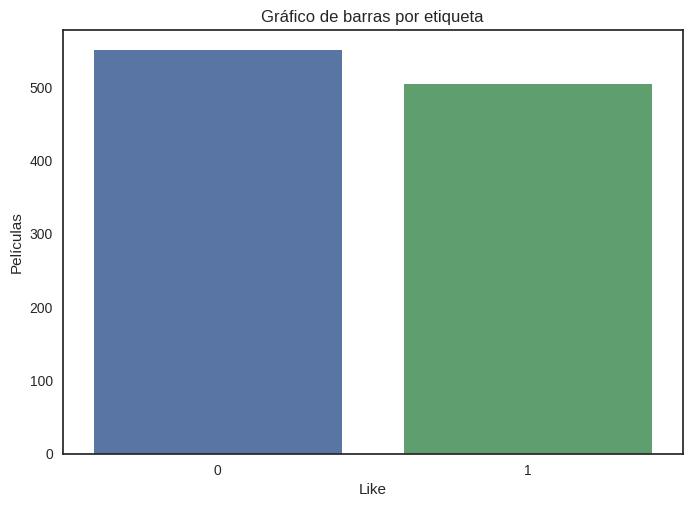

In [111]:
sns.countplot(x='like', data=data)
# Add labels
plt.title('Gráfico de barras por etiqueta')
plt.xlabel('Like')
plt.ylabel('Películas')

In [38]:
data['text_array'] = data.overview.str.split(" ")
data['n_words'] = data['text_array'].apply(lambda x: len(x))
data = data.drop(columns=['text_array'])

In [39]:
data.head(5)

,id,like,title,overview,n_words
0,11,1,La guerra de las galaxias. Episodio IV: Una nu...,"La princesa Leia, líder del movimiento rebelde...",87
1,12,1,Buscando a Nemo,"Nemo, un pececillo, hijo único muy querido y p...",69
2,13,1,Forrest Gump,Forrest Gump es un chico con deficiencias ment...,76
3,22,1,Piratas del Caribe. La maldición de la Perla N...,El aventurero Capitán Jack Sparrow recorre las...,103
4,24,1,Kill Bill: Volumen 1,"Uma Thurman es una asesina que, el día de su b...",54


In [132]:
pd.DataFrame(data.n_words.describe())

,n_words
count,1054.000000
mean,83.554080
std,34.290093
min,10.000000
25%,58.000000
50%,79.000000
75%,106.000000
max,179.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


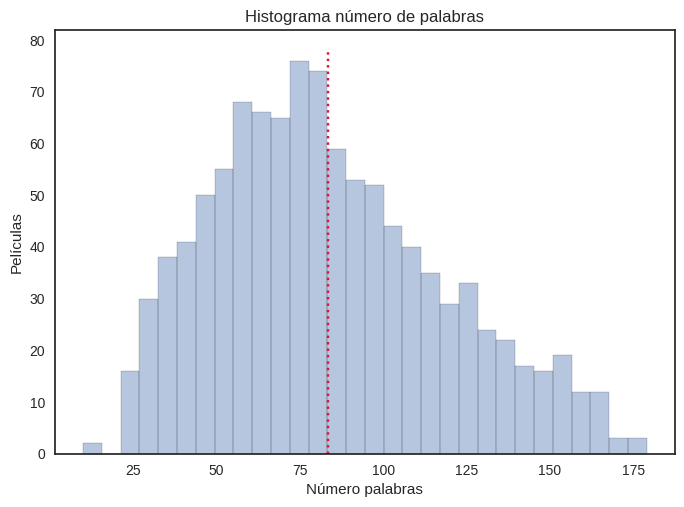

In [141]:
# seaborn histogram
sns.distplot(data['n_words'], hist=True, kde=False, 
             bins=30,
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histograma número de palabras')
plt.xlabel('Número palabras')
plt.ylabel('Películas')

mean = data.n_words.mean()
plt.vlines(mean, 0, 78, color='crimson', ls=':')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


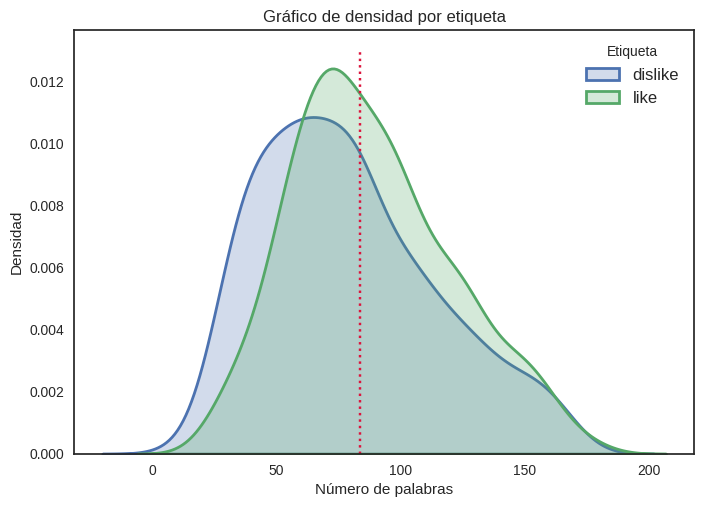

In [140]:
subset_0 = data[data['like'] == 0]
subset_1 = data[data['like'] == 1]
    
# Draw the density plot
sns.distplot(subset_0['n_words'], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'shade': True},
             label = 'dislike')

sns.distplot(subset_1['n_words'], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'shade': True},
             label = 'like')    

# Plot formatting
plt.legend(prop={'size': 12}, title = 'Etiqueta')
plt.title('Gráfico de densidad por etiqueta')
plt.xlabel('Número de palabras')
plt.ylabel('Densidad')

mean = data.n_words.mean()
plt.vlines(mean, 0, 0.013, color='crimson', ls=':')

### Wordcloud

Bibligrafia 

https://towardsdatascience.com/generate-modern-stylish-wordcloud-with-stylecloud-9cbb059696d2

https://github.com/minimaxir/stylecloud


In [143]:
%pip install stylecloud

     |████████████████████████████████| 266kB 7.8MB/s 
     |████████████████████████████████| 163kB 7.4MB/s 
     |████████████████████████████████| 92kB 7.1MB/s 
     |████████████████████████████████| 92kB 7.2MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.1-cp37-none-any.whl size=259507 sha256=1dff96fe68346d89d177ba1ea6fc0499d7ed6baa1f855d8de0157f81a61cdd14
  Stored in directory: /root/.cache/pip/wheels/fb/19/e2/5e95c310c5a86586048ced770f35e60a8221be7ef0138f61ca
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=b79158687ecef8c5704dff72a810aeb87301c5032497dc156af7960f70e7d8cf
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
  Created wheel for tinycss: filename=tinycss-0.4-cp37-none-any.whl size=43942 sha256=1478f77e9c47dbf110ceebae1c9a39f5e32e7a61912b958a818716a250469aa2
  Stored in directory: /root/.cache/pip/wheels/1b/26/08/7390b2e6d5eb3403ef35647f09576459ca567d00ac725307d5

In [284]:
stop_words = pd.read_csv("gdrive/My Drive/TFG/stopwords-es.txt",header=None)
stop_words = stop_words[0].tolist() 
#stop_words = stop_words[0].tolist() + ['vida', 'año', 'mundo', 'años', 'joven', 'padre']

In [337]:
from collections import Counter

text = " ".join(data.overview.values).lower()
myDict = Counter(text.split(" "))
df_words = pd.DataFrame(pd.Series(myDict), columns=['count'])
df_words = df_words.reset_index().rename(columns={'index': 'word'})
df_words = df_words[~df_words['word'].isin(stop_words)].sort_values('count', ascending=False)

new_stop_words = df_words[df_words['count']<=5].word.to_list()
stop_words = stop_words + new_stop_words
df_words = df_words[df_words['count']>5]

new_stop_words = df_words[df_words['count']>=100].word.to_list()
stop_words = stop_words + new_stop_words
df_words = df_words[df_words['count']<100]

In [339]:
df_words.head(20)

,word,count
554,familia,88
239,salvar,84
2533,casa,82
533,descubre,81
417,hombre,81
1728,agente,80
413,ayuda,75
96,amigos,74
86,padre,74
685,equipo,72


In [340]:
import stylecloud

stylecloud.gen_stylecloud(text = " ".join(data.overview.values), icon_name= "fas fa-ticket-alt",
                          palette='cartocolors.qualitative.Bold_5',
                          background_color='white', custom_stopwords=stop_words,
                          gradient='horizontal',
                          random_state=1996,
                          output_name='word_cloud_total.png')

/usr/local/lib/python3.7/dist-packages/stylecloud/stylecloud.py:135: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  gradient = np.array(makeMappingArray(size, palette_func.mpl_colormap))


Mostrar un countplot al lado para que se vea que sale así

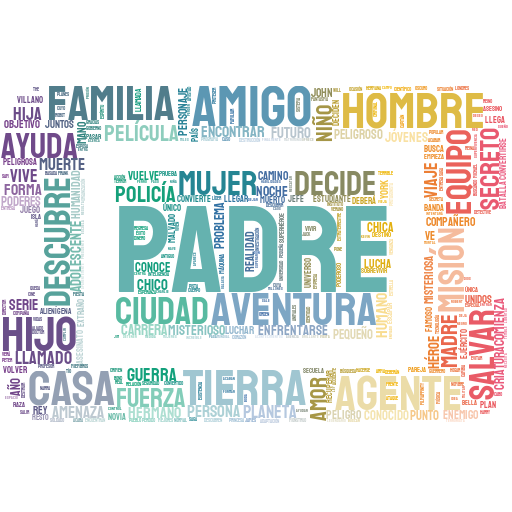

In [341]:
Image('/content/word_cloud_total.png')

In [342]:
stylecloud.gen_stylecloud(text = " ".join(subset_0.overview.values), icon_name= "fas fa-ticket-alt",
                          palette='cartocolors.qualitative.Bold_5',
                          background_color='white', custom_stopwords=stop_words,
                          gradient='horizontal',
                          random_state=1996,
                          output_name='word_cloud_0.png')

/usr/local/lib/python3.7/dist-packages/stylecloud/stylecloud.py:135: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  gradient = np.array(makeMappingArray(size, palette_func.mpl_colormap))


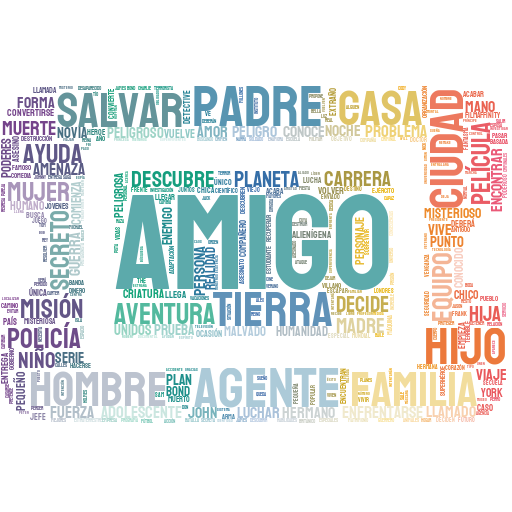

In [343]:
Image('/content/word_cloud_0.png')

In [344]:
stylecloud.gen_stylecloud(text = " ".join(subset_1.overview.values), icon_name= "fas fa-ticket-alt",
                          palette='cartocolors.qualitative.Bold_5',
                          background_color='white', custom_stopwords=stop_words,
                          gradient='horizontal',
                          random_state=1996,
                          output_name='word_cloud_1.png')

/usr/local/lib/python3.7/dist-packages/stylecloud/stylecloud.py:135: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  gradient = np.array(makeMappingArray(size, palette_func.mpl_colormap))


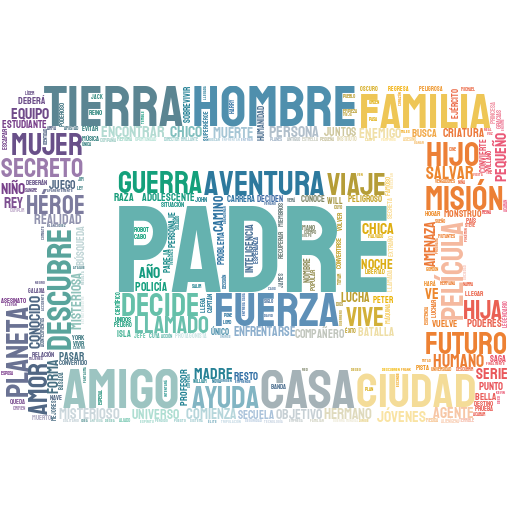

In [345]:
Image('/content/word_cloud_1.png')